# Bahrami Parameter Sweep with REM Engine

This notebook demonstrates the Bahrami parameter sweep experiment using the REM (Retrieving Effectively from Memory) model.

**Experiment Design:**
- Fixed expert agent (A) with c = 0.7
- Sweep novice agent (B) ability from c = 0.1 to 0.9
- Test 5 group decision rules: CF, UW, DMC, DSS, BF
- Measure Collective Benefit Ratio = d'_team / max(d'_A, d'_B)

**Key Question:** Do groups perform better than their best individual member?

## Baseline Definitions

**CRITICAL**: All performance ratios in this analysis use **Oracle-Best** as the denominator.

### Three Baselines

**1. Oracle-Best (PRIMARY BASELINE)**

Definition: Performance of the agent with higher true encoding accuracy (c)

- **Formula**: `Oracle-Best = max(d'_A, d'_B)` based on **true** c values
- **Purpose**: Represents the theoretical ceiling for selection-based strategies
- **Justification**: "We're comparing pooling against the best achievable by picking one person"
- **Defense**: Denominator is attack-proof because it's based on agent abilities, not realized performance

**2. DMC / Best-Odds Selection (MECHANISM CONTROL)**

Definition: Trial-by-trial selection of the agent with larger |L|

- **Purpose**: Shows whether pooling outperforms optimal selection
- **Expected Behavior**: 
  - DMC ≈ Oracle-Best when abilities are equal
  - DMC < Oracle-Best when abilities are unequal

**3. CF / Coin Flip (FLOOR BASELINE)**

Definition: Random selection between agents when they disagree

- **Purpose**: Demonstrates value of any aggregation strategy
- **Expected**: CF < Oracle-Best (random is worse than optimal)

---

### Why This Matters

**Ratios are comparable across conditions** because:
1. Denominator doesn't vary with test item difficulty (fixed test set)
2. Denominator doesn't vary with subjective parameters (α doesn't affect Oracle-Best)
3. Clear interpretation: **Ratio > 1.0 means pooling beats optimal selection**

This baseline definition prevents future attacks on "what you're dividing by" and ensures all comparisons are apples-to-apples.

In [1]:
# Enable auto-reload for module changes
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

import run_simulation

/Users/yiytan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yiytan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



BAHRAMI PARAMETER SWEEP
Expert (A): c = 0.7
Novice (B): c ∈ [0.1, 0.9] (step = 0.1)
Trials per condition: 10000
Rules: CF, UW, DMC, DSS, BF

✓ Test items generated (FIXED across all c_B conditions)
  Study items: 200, Test items: 10000 (Old: 5000, New: 5000)

[c_B = 0.1]
  d'_A = 0.784, d'_B = 0.066, d'_best = 0.784
  d'_theory = 0.787, ratio_theory = 1.004
    CF: d'_team = 0.446, ratio = 0.569, HR = 0.524, CR = 0.650
    UW: d'_team = 0.784, ratio = 1.000, HR = 0.583, CR = 0.717
    DMC: d'_team = 0.789, ratio = 1.006, HR = 0.583, CR = 0.719
    DSS: d'_team = 0.789, ratio = 1.006, HR = 0.583, CR = 0.719
    BF: d'_team = 0.784, ratio = 1.000, HR = 0.580, CR = 0.720

[c_B = 0.2]
  d'_A = 0.875, d'_B = 0.163, d'_best = 0.875
  d'_theory = 0.890, ratio_theory = 1.017
    CF: d'_team = 0.503, ratio = 0.575, HR = 0.552, CR = 0.646
    UW: d'_team = 0.834, ratio = 0.952, HR = 0.610, CR = 0.710
    DMC: d'_team = 0.844, ratio = 0.964, HR = 0.606, CR = 0.717
    DSS: d'_team = 0.844, ratio

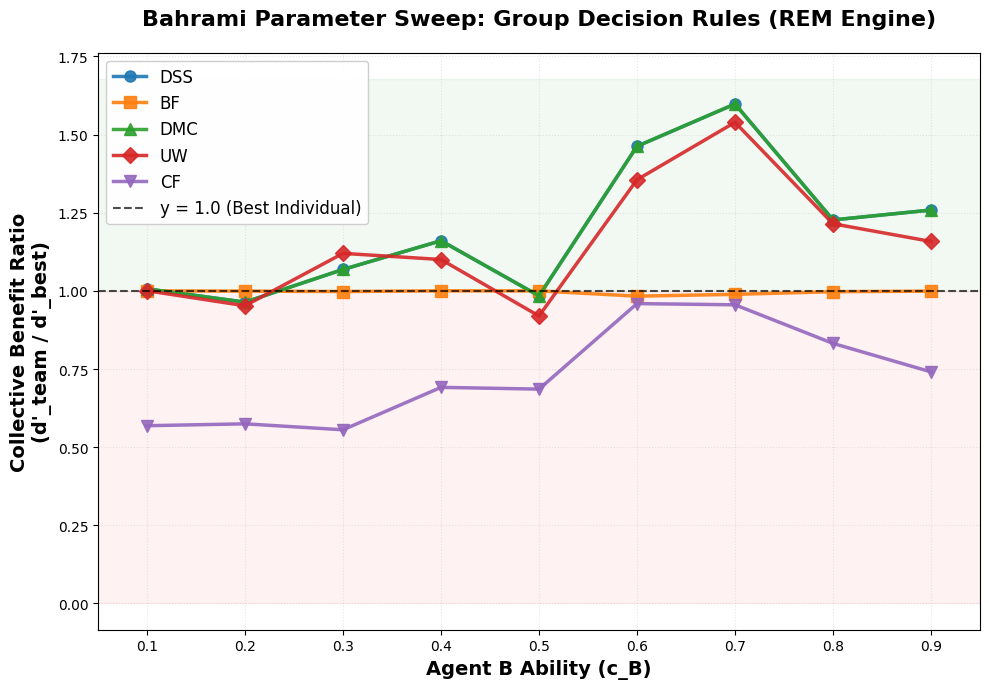

In [2]:
# Run Bahrami parameter sweep
df = run_simulation.run_bahrami_sweep()

## Part 1: Bahrami Parameter Sweep (Tim's Analysis)

Compare all 5 group decision rules across varying ability heterogeneity.

In [3]:
# Load and display results
results = pd.read_csv('../outputs/bahrami_sweep_final.csv')
print("Results Summary:")
print(f"Total rows: {len(results)}")
print(f"\nColumns: {list(results.columns)}")
print("\nFirst 10 rows:")
results.head(10)

Results Summary:
Total rows: 45

Columns: ['c_A', 'c_B', 'rule', 'dprime_A', 'dprime_B', 'dprime_team', 'd_best', 'collective_benefit_ratio', 'dprime_theory', 'ratio_theory', 'hit_rate', 'cr_rate', 'hr_best', 'cr_best']

First 10 rows:


,c_A,c_B,rule,dprime_A,dprime_B,dprime_team,d_best,collective_benefit_ratio,dprime_theory,ratio_theory,hit_rate,cr_rate,hr_best,cr_best
0,0.7,0.1,CF,0.784134,0.066212,0.445963,0.784134,0.568732,0.786925,1.003559,0.5240,0.6502,0.5796,0.7202
1,0.7,0.1,UW,0.784134,0.066212,0.784459,0.784134,1.000414,0.786925,1.003559,0.5832,0.7172,0.5796,0.7202
2,0.7,0.1,DMC,0.784134,0.066212,0.789195,0.784134,1.006453,0.786925,1.003559,0.5832,0.7188,0.5796,0.7202
3,0.7,0.1,DSS,0.784134,0.066212,0.789195,0.784134,1.006453,0.786925,1.003559,0.5832,0.7188,0.5796,0.7202
4,0.7,0.1,BF,0.784134,0.066212,0.784134,0.784134,1.000000,0.786925,1.003559,0.5796,0.7202,0.5796,0.7202
5,0.7,0.2,CF,0.875311,0.163114,0.503069,0.875311,0.574731,0.890380,1.017215,0.5516,0.6456,0.6142,0.7208
6,0.7,0.2,UW,0.875311,0.163114,0.833692,0.875311,0.952452,0.890380,1.017215,0.6100,0.7104,0.6142,0.7208
7,0.7,0.2,DMC,0.875311,0.163114,0.843788,0.875311,0.963987,0.890380,1.017215,0.6062,0.7172,0.6142,0.7208
8,0.7,0.2,DSS,0.875311,0.163114,0.843788,0.875311,0.963987,0.890380,1.017215,0.6062,0.7172,0.6142,0.7208
9,0.7,0.2,BF,0.875311,0.163114,0.874717,0.875311,0.999321,0.890380,1.017215,0.6142,0.7206,0.6142,0.7208


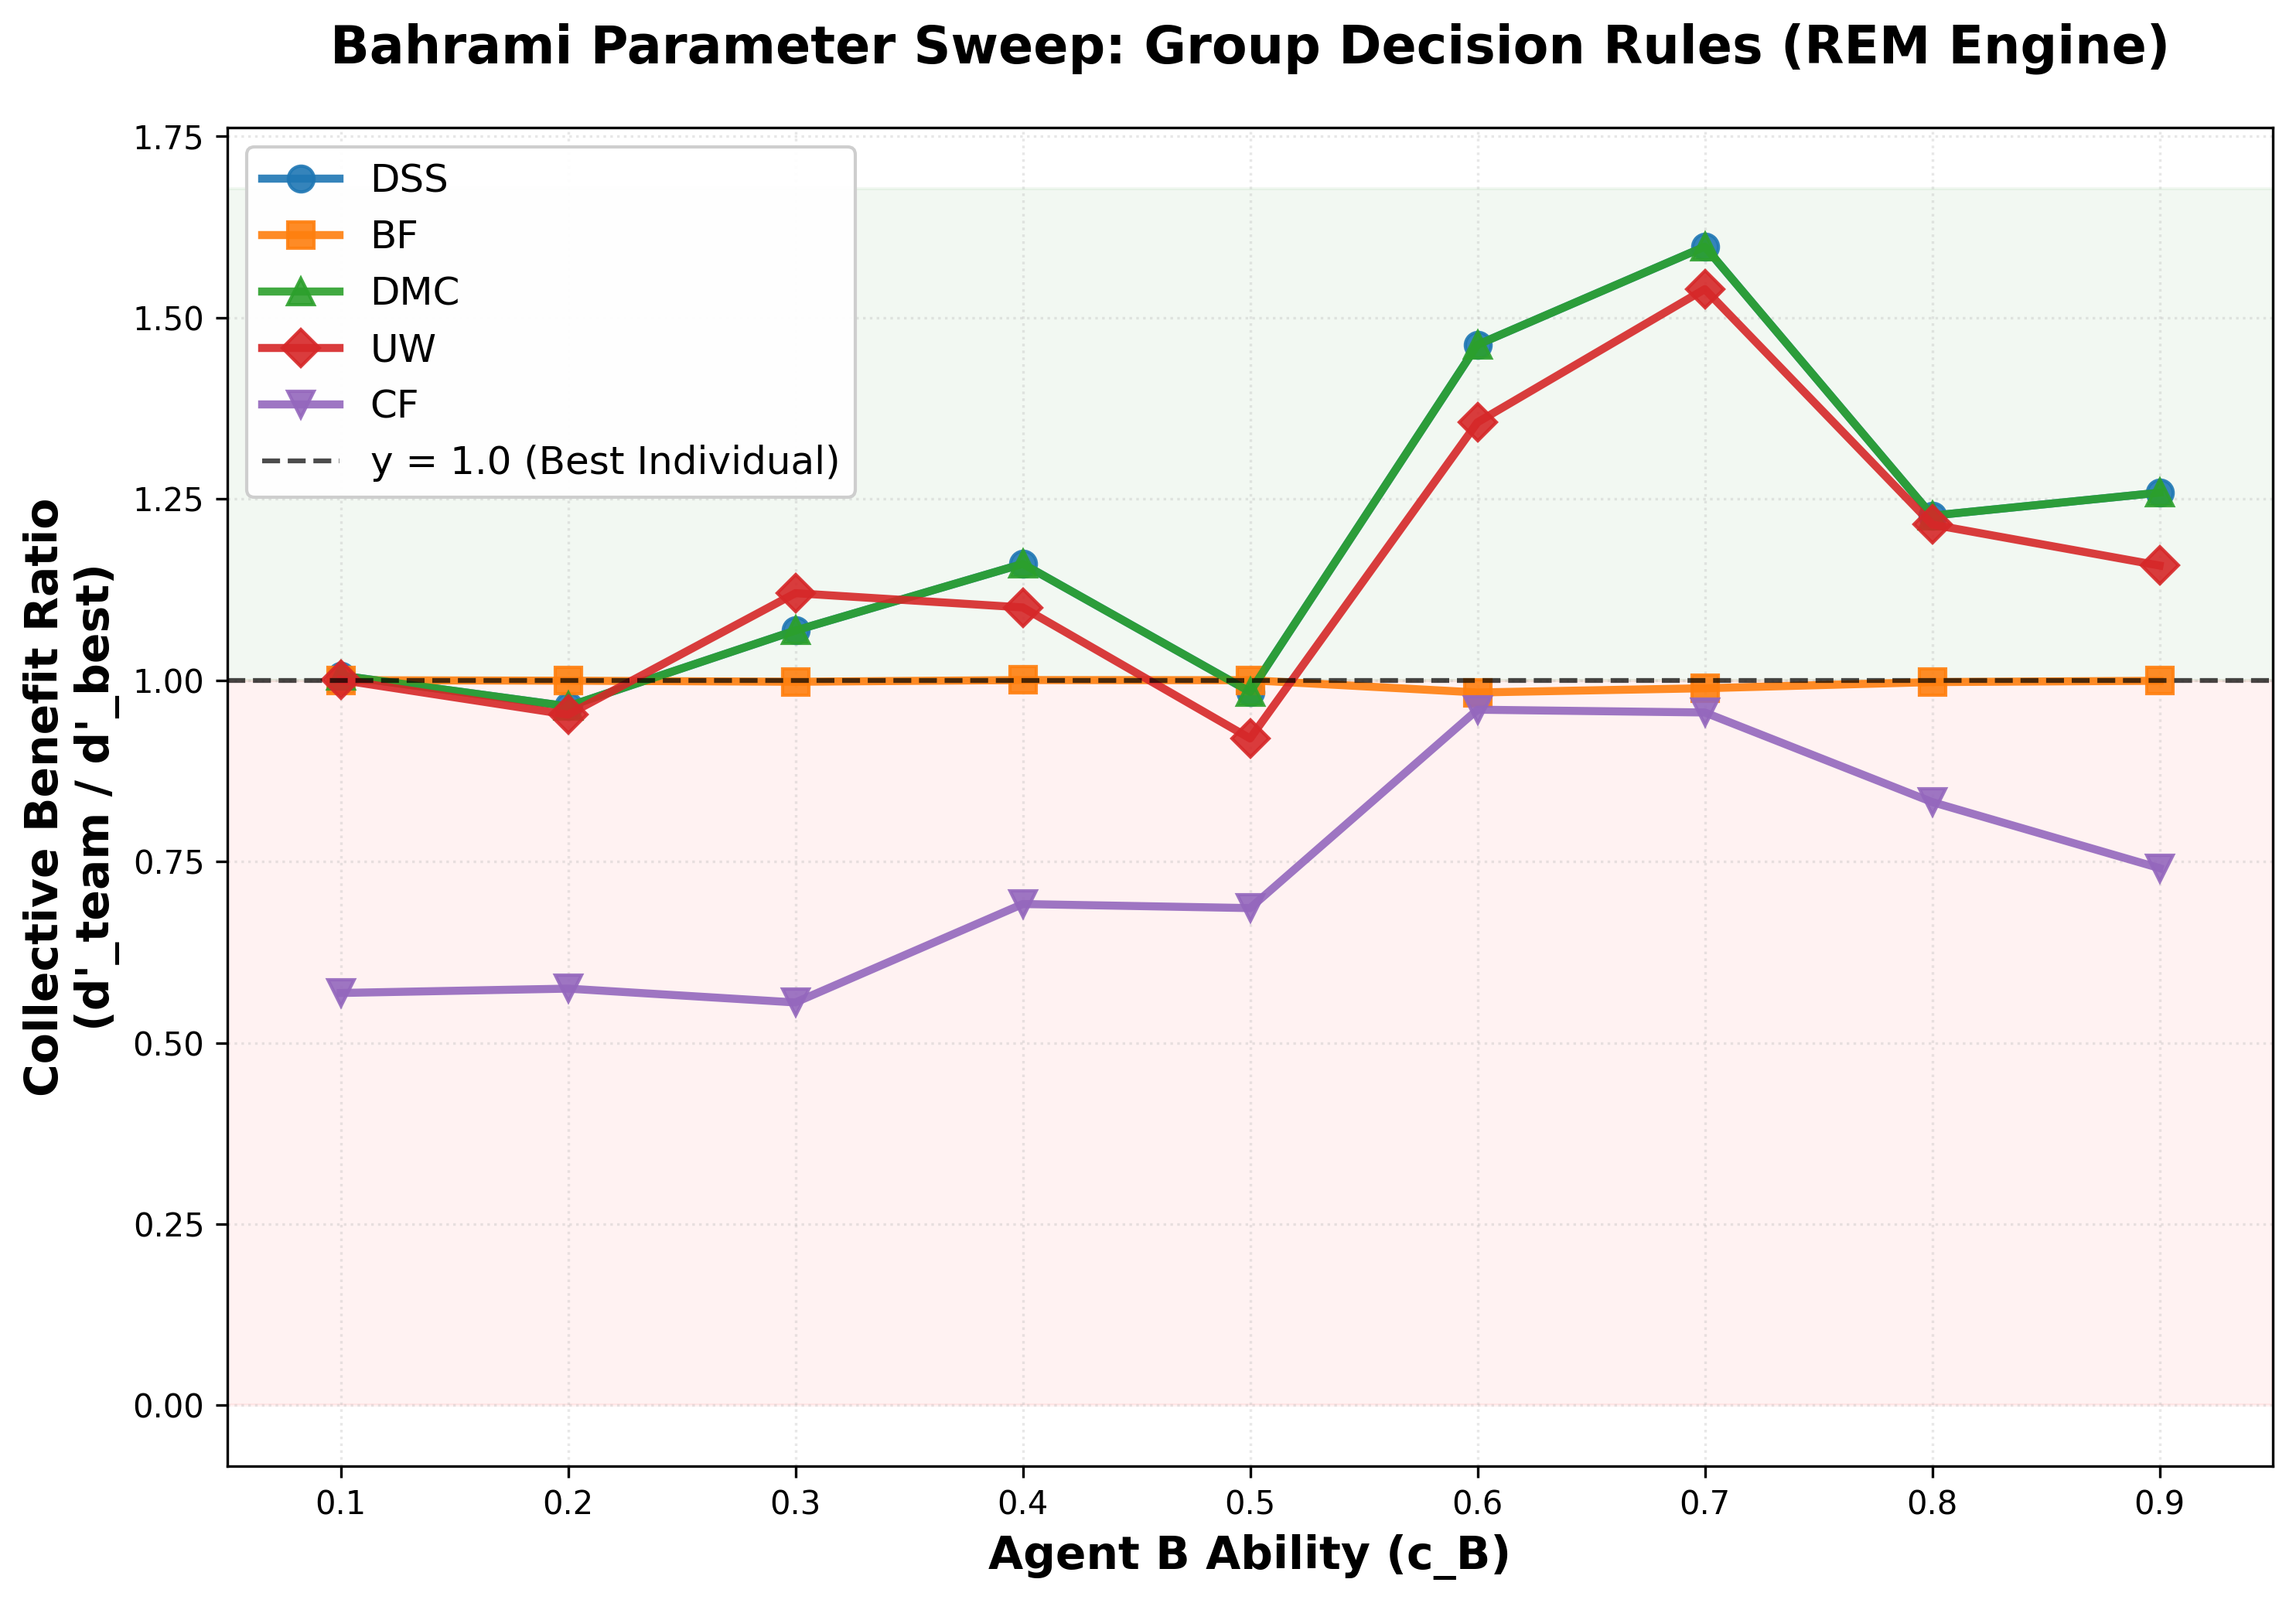

In [4]:
# Display the Bahrami plot (5 rules)
display(Image('../outputs/bahrami_sweep_plot.png'))

### Phenomenon: Collective Benefit Ratio

The plot above shows the **phenomenon** we observe: how group performance (relative to the best individual) varies with ability heterogeneity. 

**Key observation**: DSS and DMC achieve Collective Benefit > 1.0 across most conditions, meaning groups can outperform their best member through evidence pooling.

### Mechanism: Hit Rate & Correct Rejection Decomposition

To understand **why** we see collective benefit, we decompose performance into its two components:
- **Hit Rate**: Correctly identifying Old items → P(say "Old" | Old)
- **Correct Rejection Rate**: Correctly identifying New items → P(say "New" | New)

The combined figure below shows both components side-by-side with their respective y-axis ranges cropped to highlight meaningful variation.

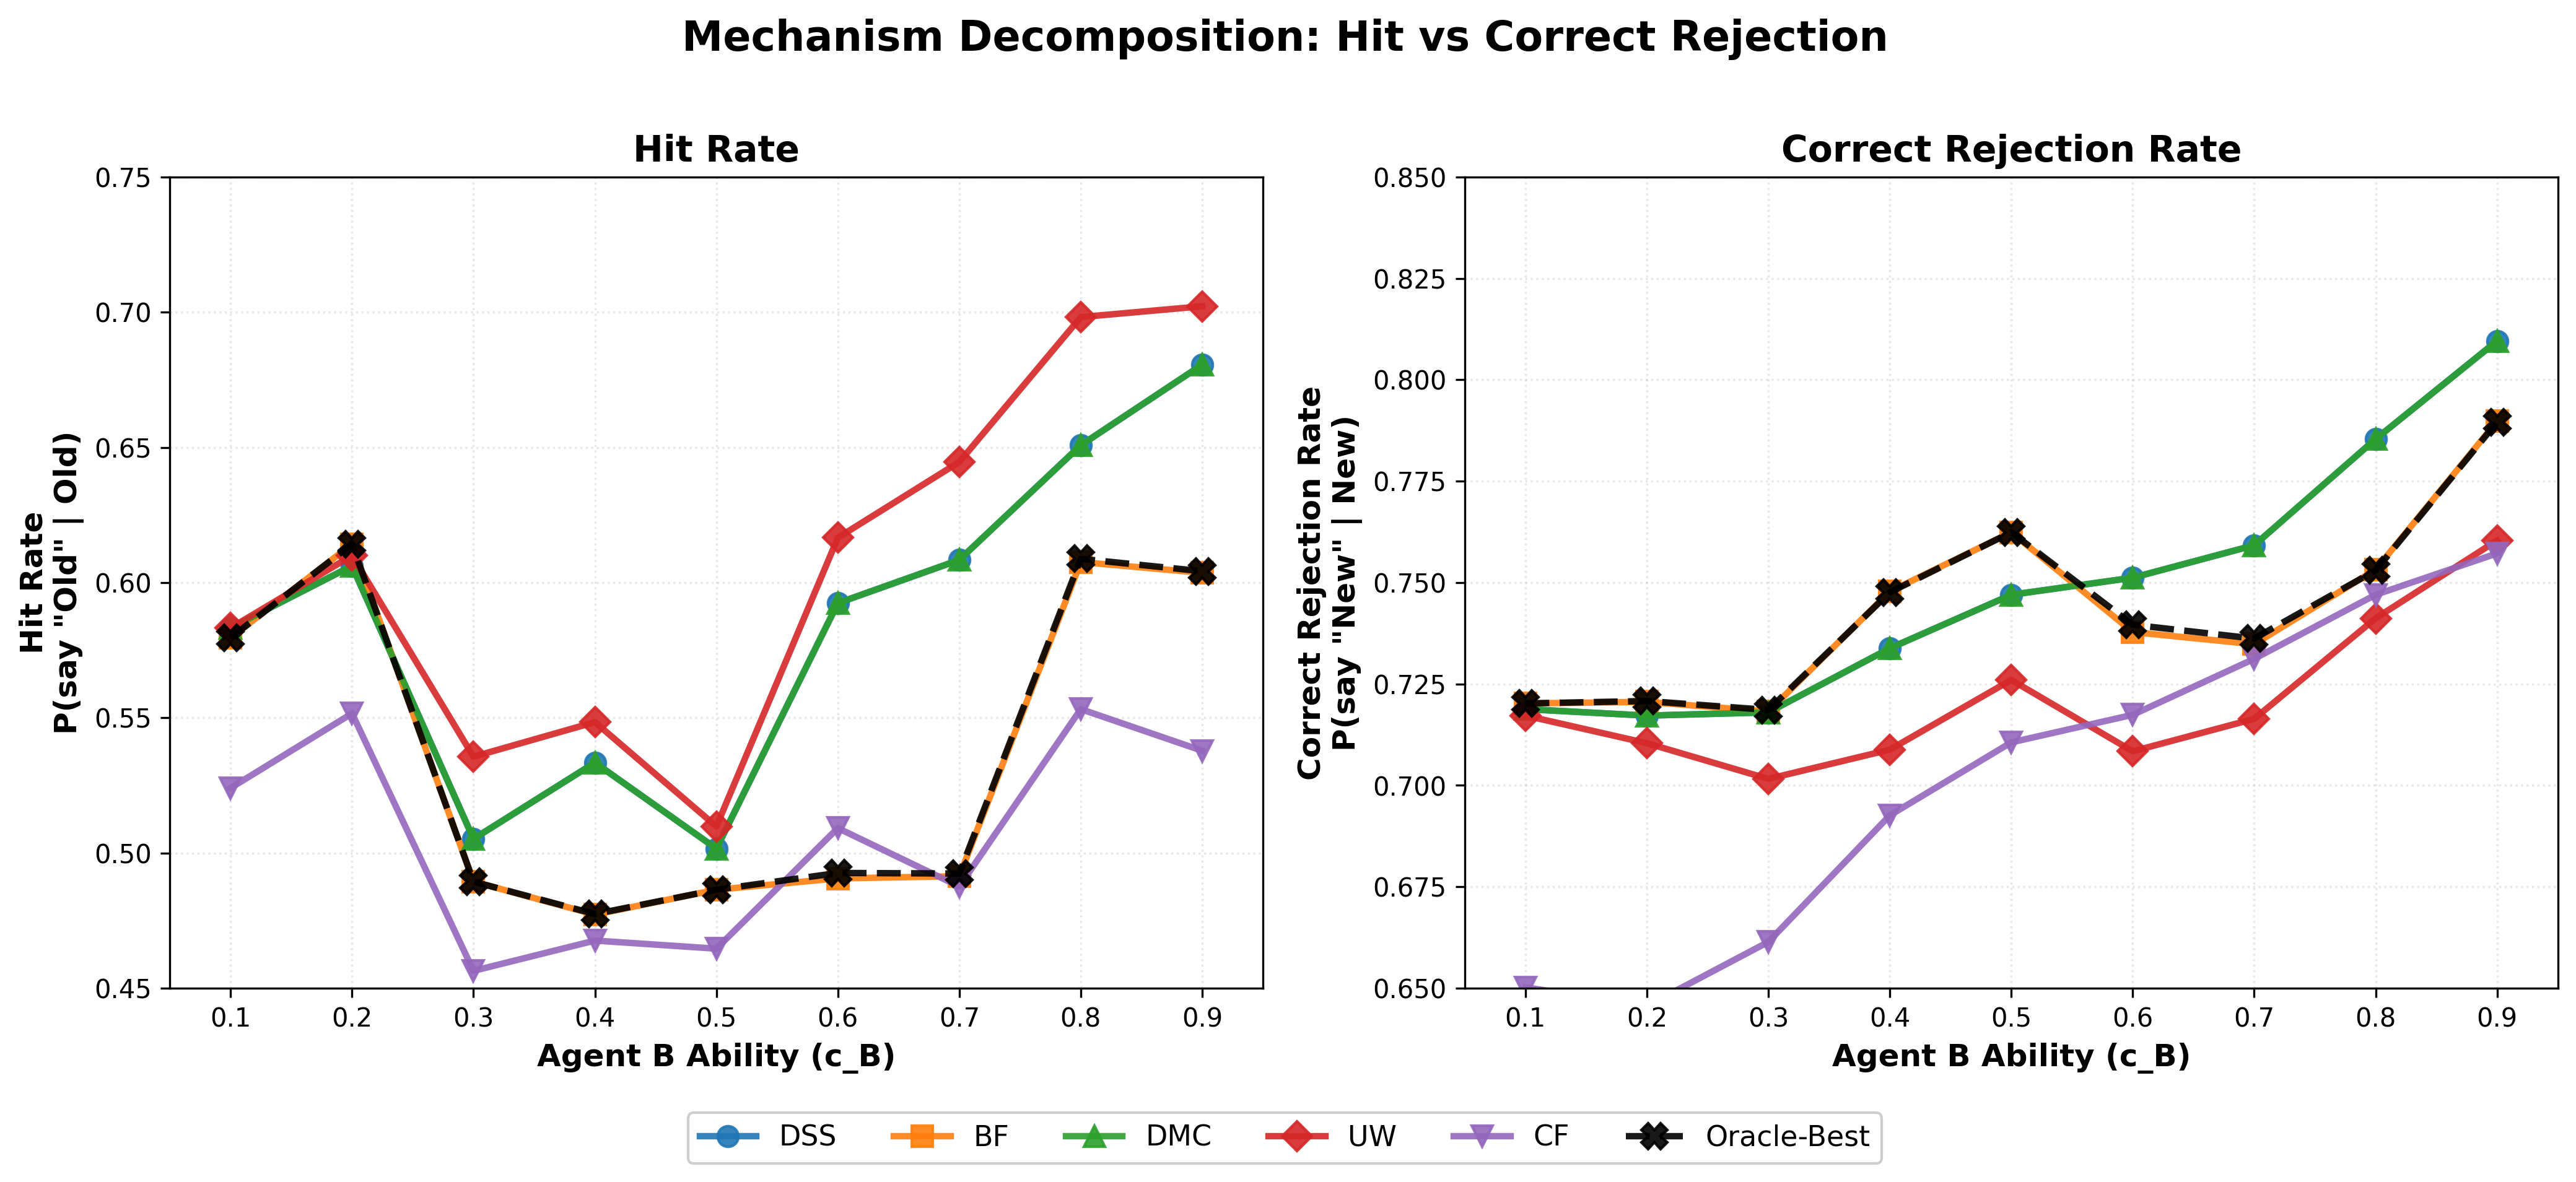

In [5]:
# Mechanism: Combined Hit Rate & Correct Rejection Rate
display(Image('../outputs/bahrami_hit_cr_combined.png'))

### Diagnostic: Improvement over Oracle-Best

The delta figure below shows the **improvement** of each rule over the Oracle-Best baseline:
- **ΔHR** = HR_rule − HR_OracleBest
- **ΔCR** = CR_rule − CR_OracleBest

Positive values indicate the rule beats Oracle-Best on that metric. The black dashed line at y=0 represents Oracle-Best performance.

This decomposition reveals **where** collective benefit comes from:
- Does the group gain on Hit Rate (better at recognizing Old items)?
- Does the group gain on CR Rate (better at rejecting New items)?
- Or both?

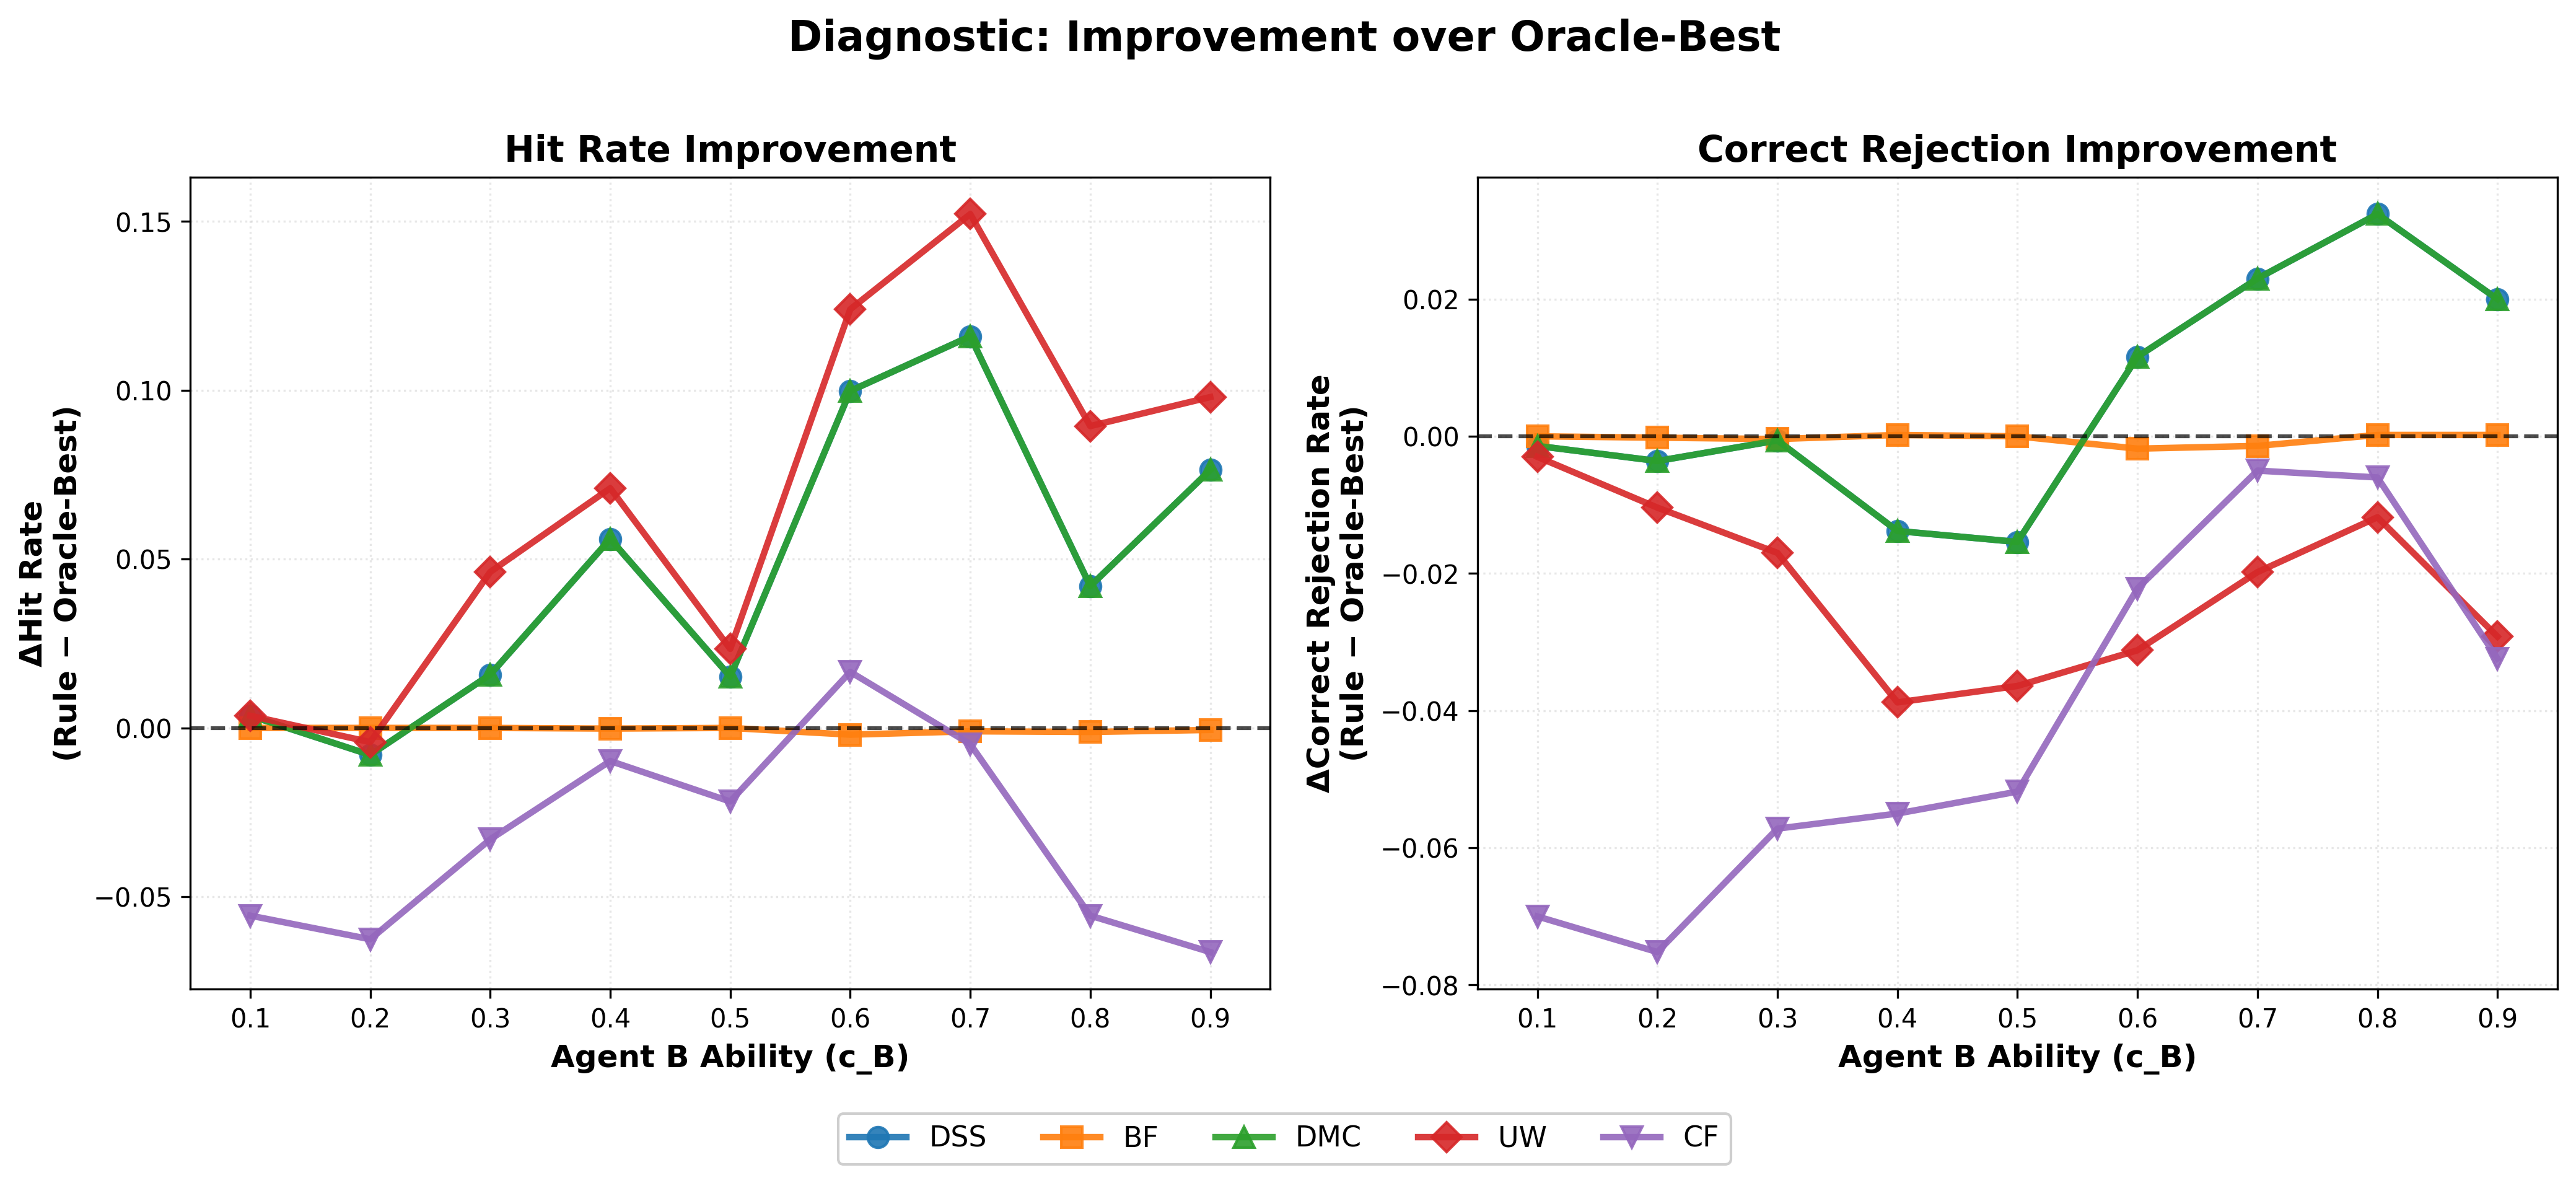

In [6]:
# Diagnostic: Delta HR / Delta CR (Improvement over Oracle-Best)
display(Image('../outputs/bahrami_delta_hr_cr.png'))

---

## Part 2: Confidence Miscalibration (Prelec Weighting)

This section explores how **confidence miscalibration** affects group decision-making using Prelec probability weighting.

### Experimental Design

**Fixed Parameters:**
- Equal memory ability: c_A = c_B = 0.7
- Agent A miscalibration: α_A = 1.2 (overconfident)

**Sweep Parameter:**
- Agent B miscalibration: α_B from 0.5 to 1.5 (step 0.1)

**Models Tested:**
1. **UW_Miscal**: Uniform Weighting with Prelec weighting
2. **DMC_Miscal**: Defer to Max Confidence with Prelec weighting
3. **DSS**: Direct Signal Sharing (α-independent benchmark)
4. **CF**: Coin Flip (α-independent benchmark)

### Prelec Weighting Function

The Prelec function transforms objective probabilities into subjective weights:

$$w(p) = \exp(-\beta \cdot (-\ln p)^\alpha)$$

where:
- $\alpha$: Miscalibration parameter
  - $\alpha = 1$: Calibrated (w = p)
  - $\alpha > 1$: Overconfident (inflated extremes)
  - $\alpha < 1$: Underconfident (compressed extremes)
- $\beta = (\ln 2)^{1-\alpha}$: Ensures w(0.5) = 0.5

### Key Question

**How does matching vs mismatching miscalibration affect group performance?**
- When both agents are overconfident (α_A = α_B = 1.2), do they perform better/worse?
- When agents have opposite biases (α_A = 1.2, α_B = 0.8), does this help or hurt?


CONFIDENCE MISCALIBRATION SWEEP (PRELEC WEIGHTING)
Equal Ability: c_A = c_B = 0.7
Agent A: α = 1.2 (Overconfident)
Agent B: α ∈ [0.5, 1.5] (step = 0.1)
Trials per rep: 2000, Monte Carlo reps: 20

✓ Test items generated (FIXED across all conditions)
  Study items: 200, Test items: 2000 (Old: 1000, New: 1000)

RUNNING OPTIMIZED SIMULATION (Compute Once, Transform Many)
  Rep 1/20 complete (0.6s elapsed, ETA: 10.8s)
  Rep 5/20 complete (2.9s elapsed, ETA: 8.6s)
  Rep 10/20 complete (5.7s elapsed, ETA: 5.7s)
  Rep 15/20 complete (8.5s elapsed, ETA: 2.8s)
  Rep 20/20 complete (11.3s elapsed, ETA: 0.0s)

✓ Simulation complete in 11.3s

RESULTS BY α_B
   α_B |    UW_Miscal |   DMC_Miscal |          DSS |           CF
----------------------------------------------------------------------
   0.5 |       1.3560 |       1.3560 |       1.4401 |       0.9570
   0.6 |       1.3660 |       1.3660 |       1.4401 |       0.9570
   0.7 |       1.3845 |       1.3845 |       1.4401 |       0.9570
   0.8 

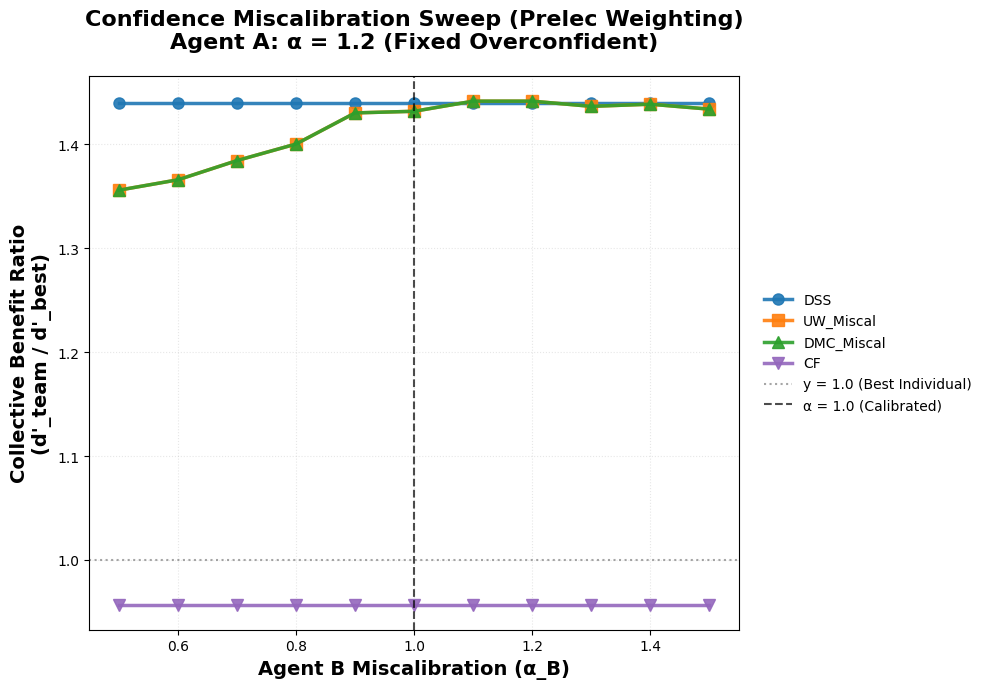

In [7]:
# Run miscalibration parameter sweep
df_miscal = run_simulation.run_miscalibration_sweep()

In [8]:
# Load and display results
results_miscal = pd.read_csv('../outputs/miscalibration_sweep.csv')
print("Miscalibration Sweep Results Summary:")
print(f"Total rows: {len(results_miscal)}")
print(f"\nColumns: {list(results_miscal.columns)}")
print("\nFirst 10 rows:")
results_miscal.head(10)

Miscalibration Sweep Results Summary:
Total rows: 44

Columns: ['c_A', 'c_B', 'alpha_A', 'alpha_B', 'model', 'collective_benefit_ratio', 'cbr_std', 'n_reps']

First 10 rows:


,c_A,c_B,alpha_A,alpha_B,model,collective_benefit_ratio,cbr_std,n_reps
0,0.7,0.7,1.2,0.5,UW_Miscal,1.356014,0.115384,20
1,0.7,0.7,1.2,0.5,DMC_Miscal,1.356014,0.115384,20
2,0.7,0.7,1.2,0.5,DSS,1.440109,0.151516,20
3,0.7,0.7,1.2,0.5,CF,0.957009,0.079987,20
4,0.7,0.7,1.2,0.6,UW_Miscal,1.365994,0.121169,20
5,0.7,0.7,1.2,0.6,DMC_Miscal,1.365994,0.121169,20
6,0.7,0.7,1.2,0.6,DSS,1.440109,0.151516,20
7,0.7,0.7,1.2,0.6,CF,0.957009,0.079987,20
8,0.7,0.7,1.2,0.7,UW_Miscal,1.384526,0.134930,20
9,0.7,0.7,1.2,0.7,DMC_Miscal,1.384526,0.134930,20


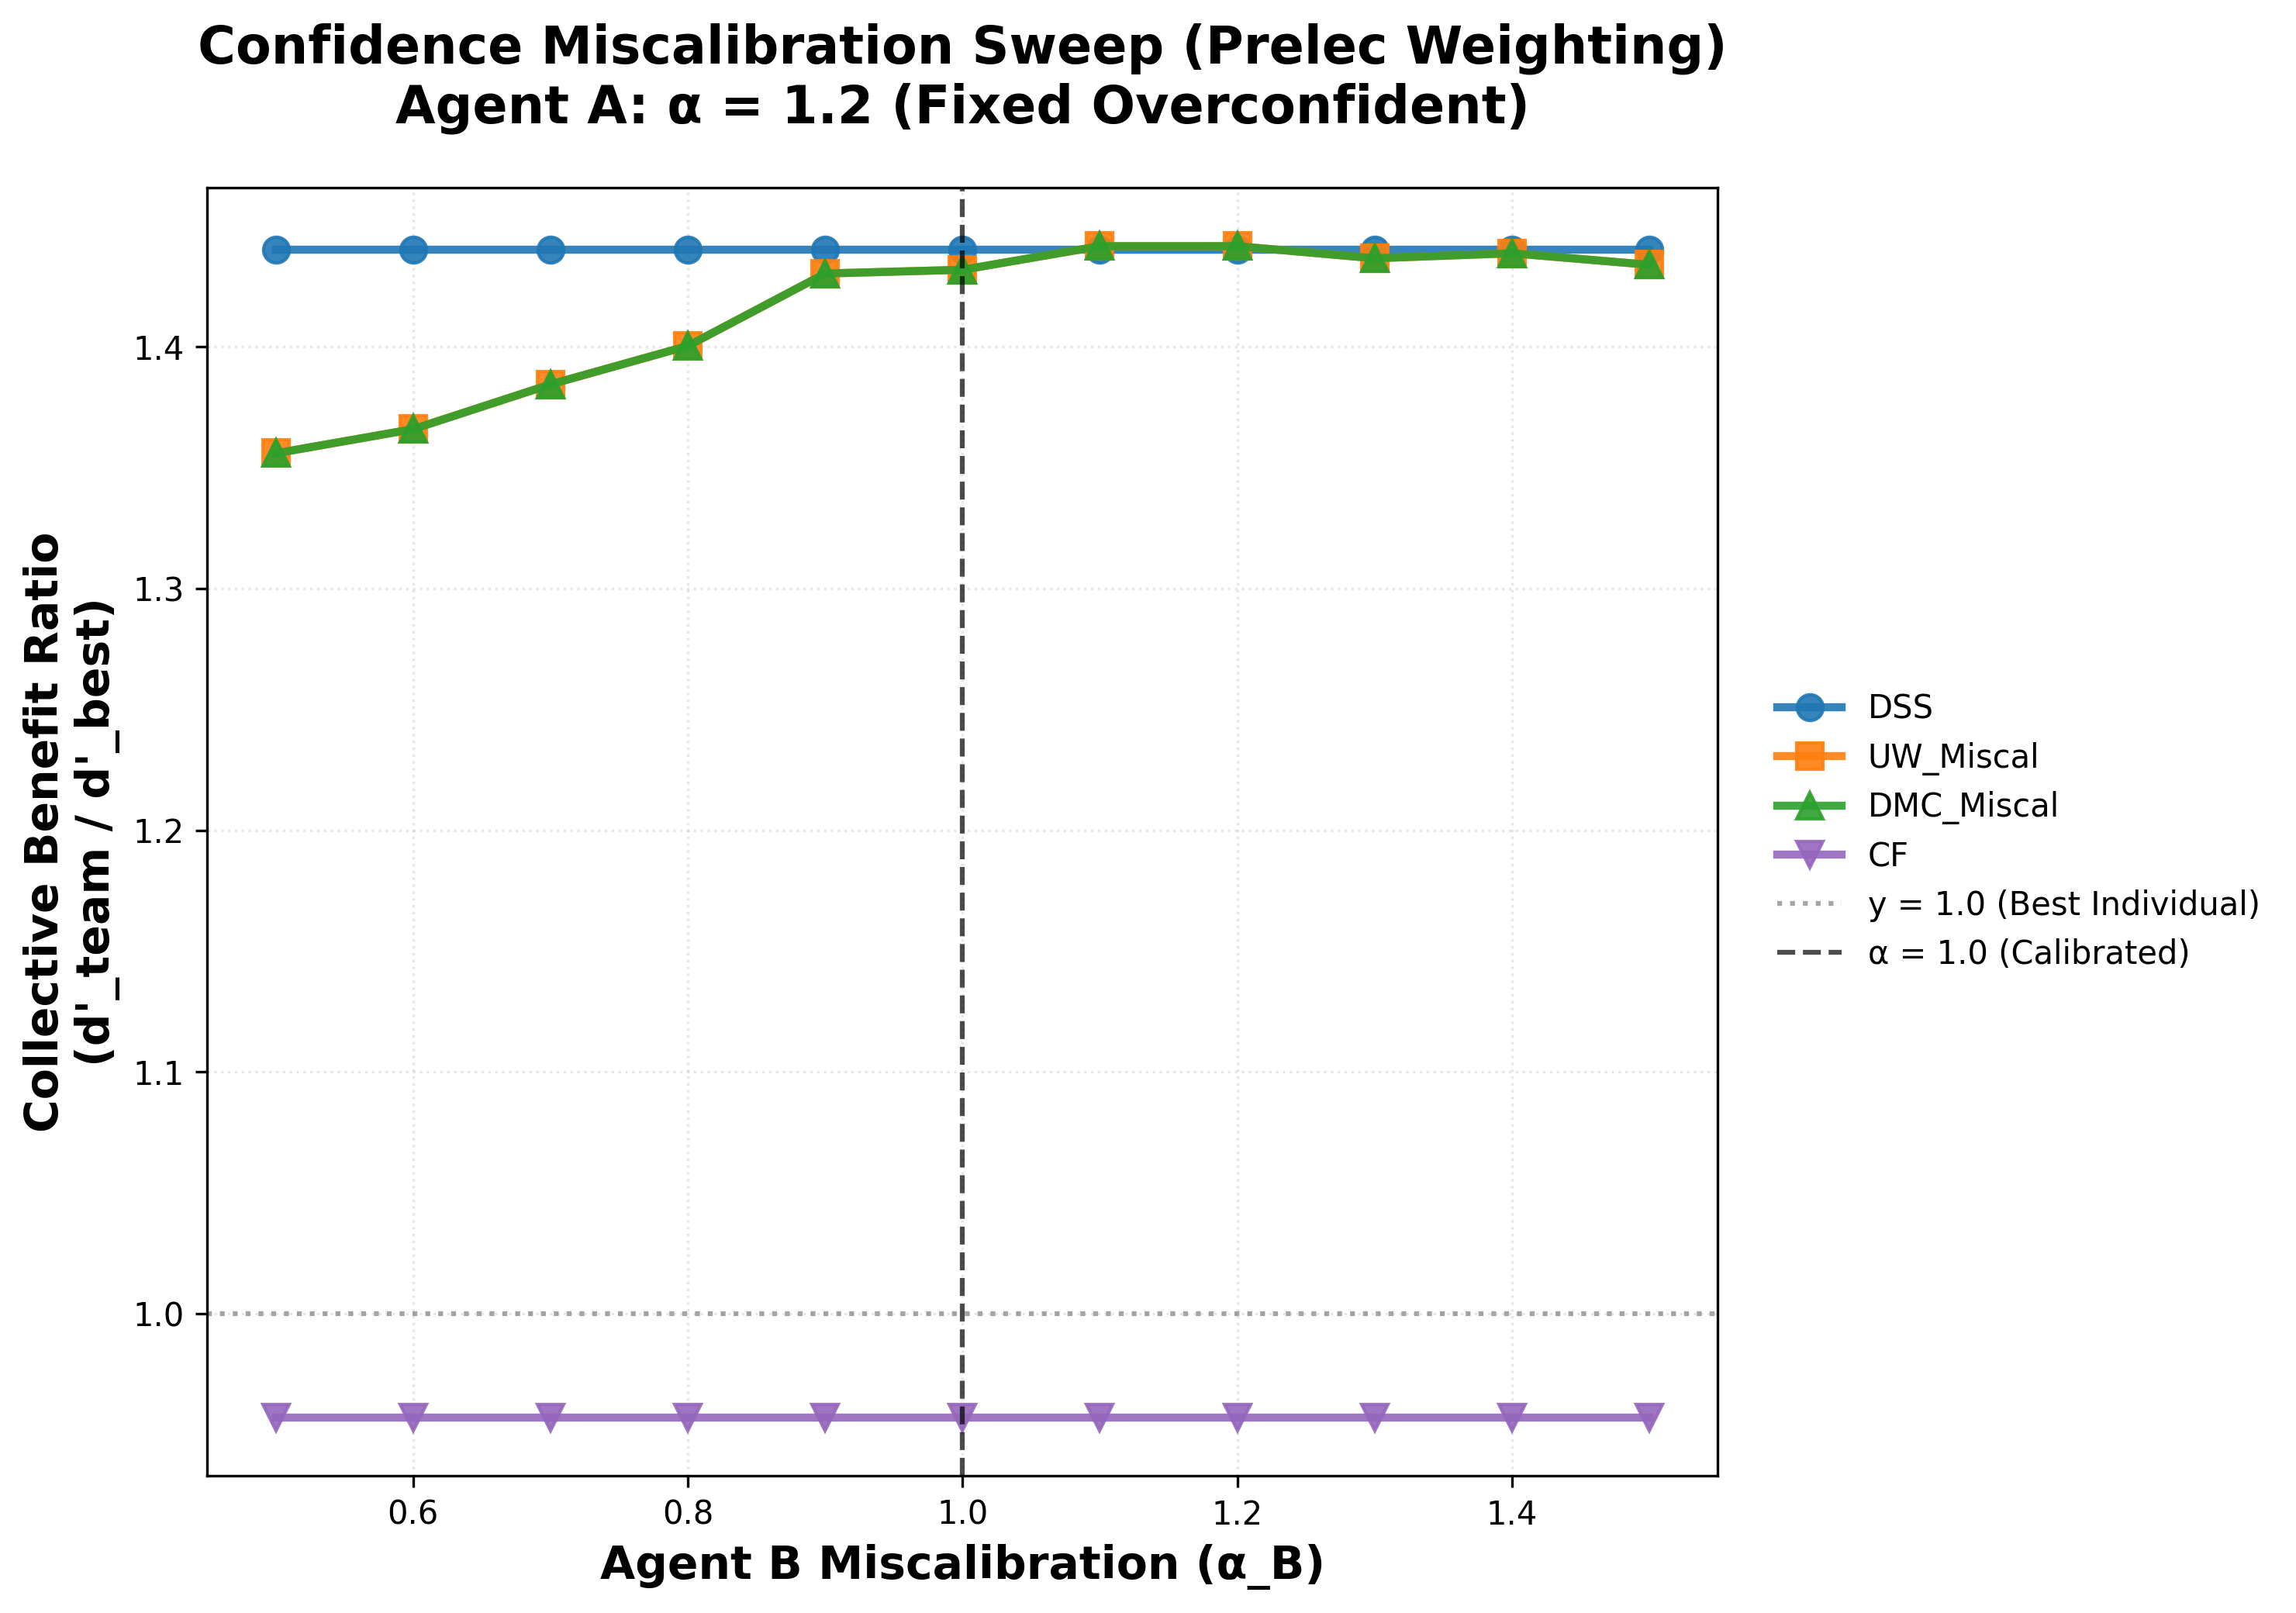

In [9]:
# Display the miscalibration plot
display(Image('../outputs/miscalibration_plot.png'))

In [10]:
# Quantitative analysis: Examine performance at key alpha_B values
print("Performance at Key Miscalibration Levels:")
print("="*70)

key_alphas = [0.5, 0.8, 1.0, 1.2, 1.5]
for alpha_B in key_alphas:
    subset = results_miscal[np.isclose(results_miscal['alpha_B'], alpha_B)]
    if len(subset) > 0:
        print(f"\nα_B = {alpha_B:.1f}:")
        for model in ['WCS_Miscal', 'DMC_Miscal', 'DSS', 'CF']:
            row = subset[subset['model'] == model]
            if len(row) > 0:
                ratio = row['collective_benefit_ratio'].values[0]
                print(f"  {model:12s}: {ratio:.4f}")

Performance at Key Miscalibration Levels:

α_B = 0.5:
  DMC_Miscal  : 1.3560
  DSS         : 1.4401
  CF          : 0.9570

α_B = 0.8:
  DMC_Miscal  : 1.4004
  DSS         : 1.4401
  CF          : 0.9570

α_B = 1.0:
  DMC_Miscal  : 1.4320
  DSS         : 1.4401
  CF          : 0.9570

α_B = 1.2:
  DMC_Miscal  : 1.4417
  DSS         : 1.4401
  CF          : 0.9570

α_B = 1.5:
  DMC_Miscal  : 1.4340
  DSS         : 1.4401
  CF          : 0.9570


---

## Part 2 Sanity Check: Why DSS is Flat (in Mean)

### Theoretical Prediction

DSS uses **raw log-odds** (L_A + L_B), which are **mathematically invariant** to the subjective confidence parameter α **in expectation**.

**Why DSS is Flat in Mean**:

1. **DSS decision rule**: `L_team = L_A + L_B`
   - No Prelec weighting
   - No confidence transformation
   - Direct evidence pooling

2. **Alpha only affects UW_Miscal and DMC_Miscal** through Prelec weighting:
   - UW_Miscal: Uses w(p) to weight probabilities
   - DMC_Miscal: Uses w(p) to determine confidence
   - DSS: Ignores w(p) entirely

3. **Independence of α and L**:
   - Log-odds L_A and L_B depend on memory traces (c, not α)
   - α only transforms L into subjective confidence
   - Since DSS uses raw L, it's α-independent in expectation

### Critical Distinction: Expectation vs. Realization

**KEY INSIGHT**: DSS is flat in **expectation**, not in **realization**.

- **Expectation**: E[DSS_CBR] is constant across α_B values
- **Realization**: Individual DSS_CBR values show natural sampling noise

**Why we expect variance > 0**:
- Different trace realizations (even with fixed c_A, c_B) → different L values
- Different L values → different d' values → different d_best values
- This is **healthy Monte Carlo sampling noise**, not a bug!

### Expected Pattern

- **✓ DSS curve: Flat in mean** with natural jitter (variance 0.001-0.05)
- **✓ CF curve: Similar pattern** (also α-independent)
- **✓ UW_Miscal: Smooth trend** with α_B (responds to miscalibration)
- **✓ DMC_Miscal: Smooth trend** with α_B (responds to miscalibration)

### The "Exam vs Brain" Analogy

Think of it this way:
- **Test items = The exam** → Fixed (ensures comparable difficulty)
- **Memory traces = The brain** → Varies (represents stochastic encoding)

Even with the same exam and same abilities (c_A = c_B), different "subjects" (trace realizations) will have different encoding noise → different performance → natural variance.

**Perfect data (variance = 0) is fake data** in a Monte Carlo simulation!

---

## Part 3: Rich's Conflict Resolution Model

This section implements Rich Shiffrin's conflict resolution model - a completely independent analysis examining how groups decide who to follow when agents disagree, based on evidence strength difference.

### Core Question

When two agents disagree (one says "Old", one says "New"), how does the group decide who to follow?

### Model Logic

1. **Convert log-odds to Strength:**
   - Odds: $\phi = \exp(L)$
   - Scaled Odds: $\phi' = \phi^{1/11}$ (fixed power)
   - Strength: $S = \max(\phi', 1/\phi')$

2. **Identify Conflict Trials:**
   - Conflict occurs when $(L_A > 0 \text{ and } L_B < 0)$ OR $(L_A < 0 \text{ and } L_B > 0)$

3. **Compute Difference:**
   - $D = |S_A - S_B|$

4. **Decision Rule:**
   - Probability of choosing stronger agent: $P = \left(\frac{1 + D}{2 + D}\right)^\beta$
   - When $D = 0$: Random guess (P = 0.5)
   - As $D \to \infty$: Deterministic choice (P → 1)
   - $\beta$ parameter: Default 1.0, can be adjusted

### Empirical Results Split by Ground Truth

The plot below shows separate curves for:
- **Old trials (Targets)**: Green circles
- **New trials (Lures)**: Blue squares

This decomposition reveals whether "choosing stronger" behaves differently depending on ground truth.


RICH'S CONFLICT RESOLUTION MODEL
Equal Ability: c_A = c_B = 0.7
Test trials: 5000

Running Rich_Conflict model...
Running CF baseline...

CONFLICT TRIAL ANALYSIS
Total trials: 5000
Conflict trials: 2172 (43.4%)
  Old conflict trials: 1210
  New conflict trials: 962

✓ Results saved: ../outputs/rich_conflict_results.csv
✓ Plot saved: ../outputs/rich_conflict_plot.png

SUMMARY
Rich_Conflict d': 0.695
CF baseline d': 0.689

Mean empirical P(choose stronger | Old): 0.567
Mean empirical P(choose stronger | New): 0.505

✓ RICH'S CONFLICT SIMULATION COMPLETE


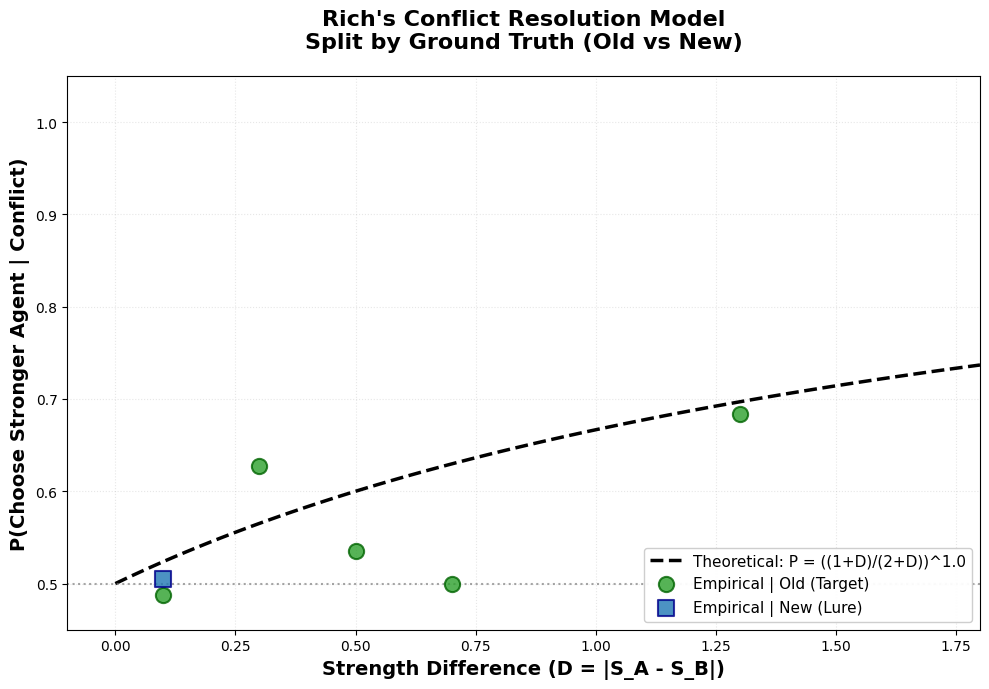

In [11]:
# Run Rich's conflict resolution simulation
df_rich = run_simulation.run_rich_conflict_simulation()

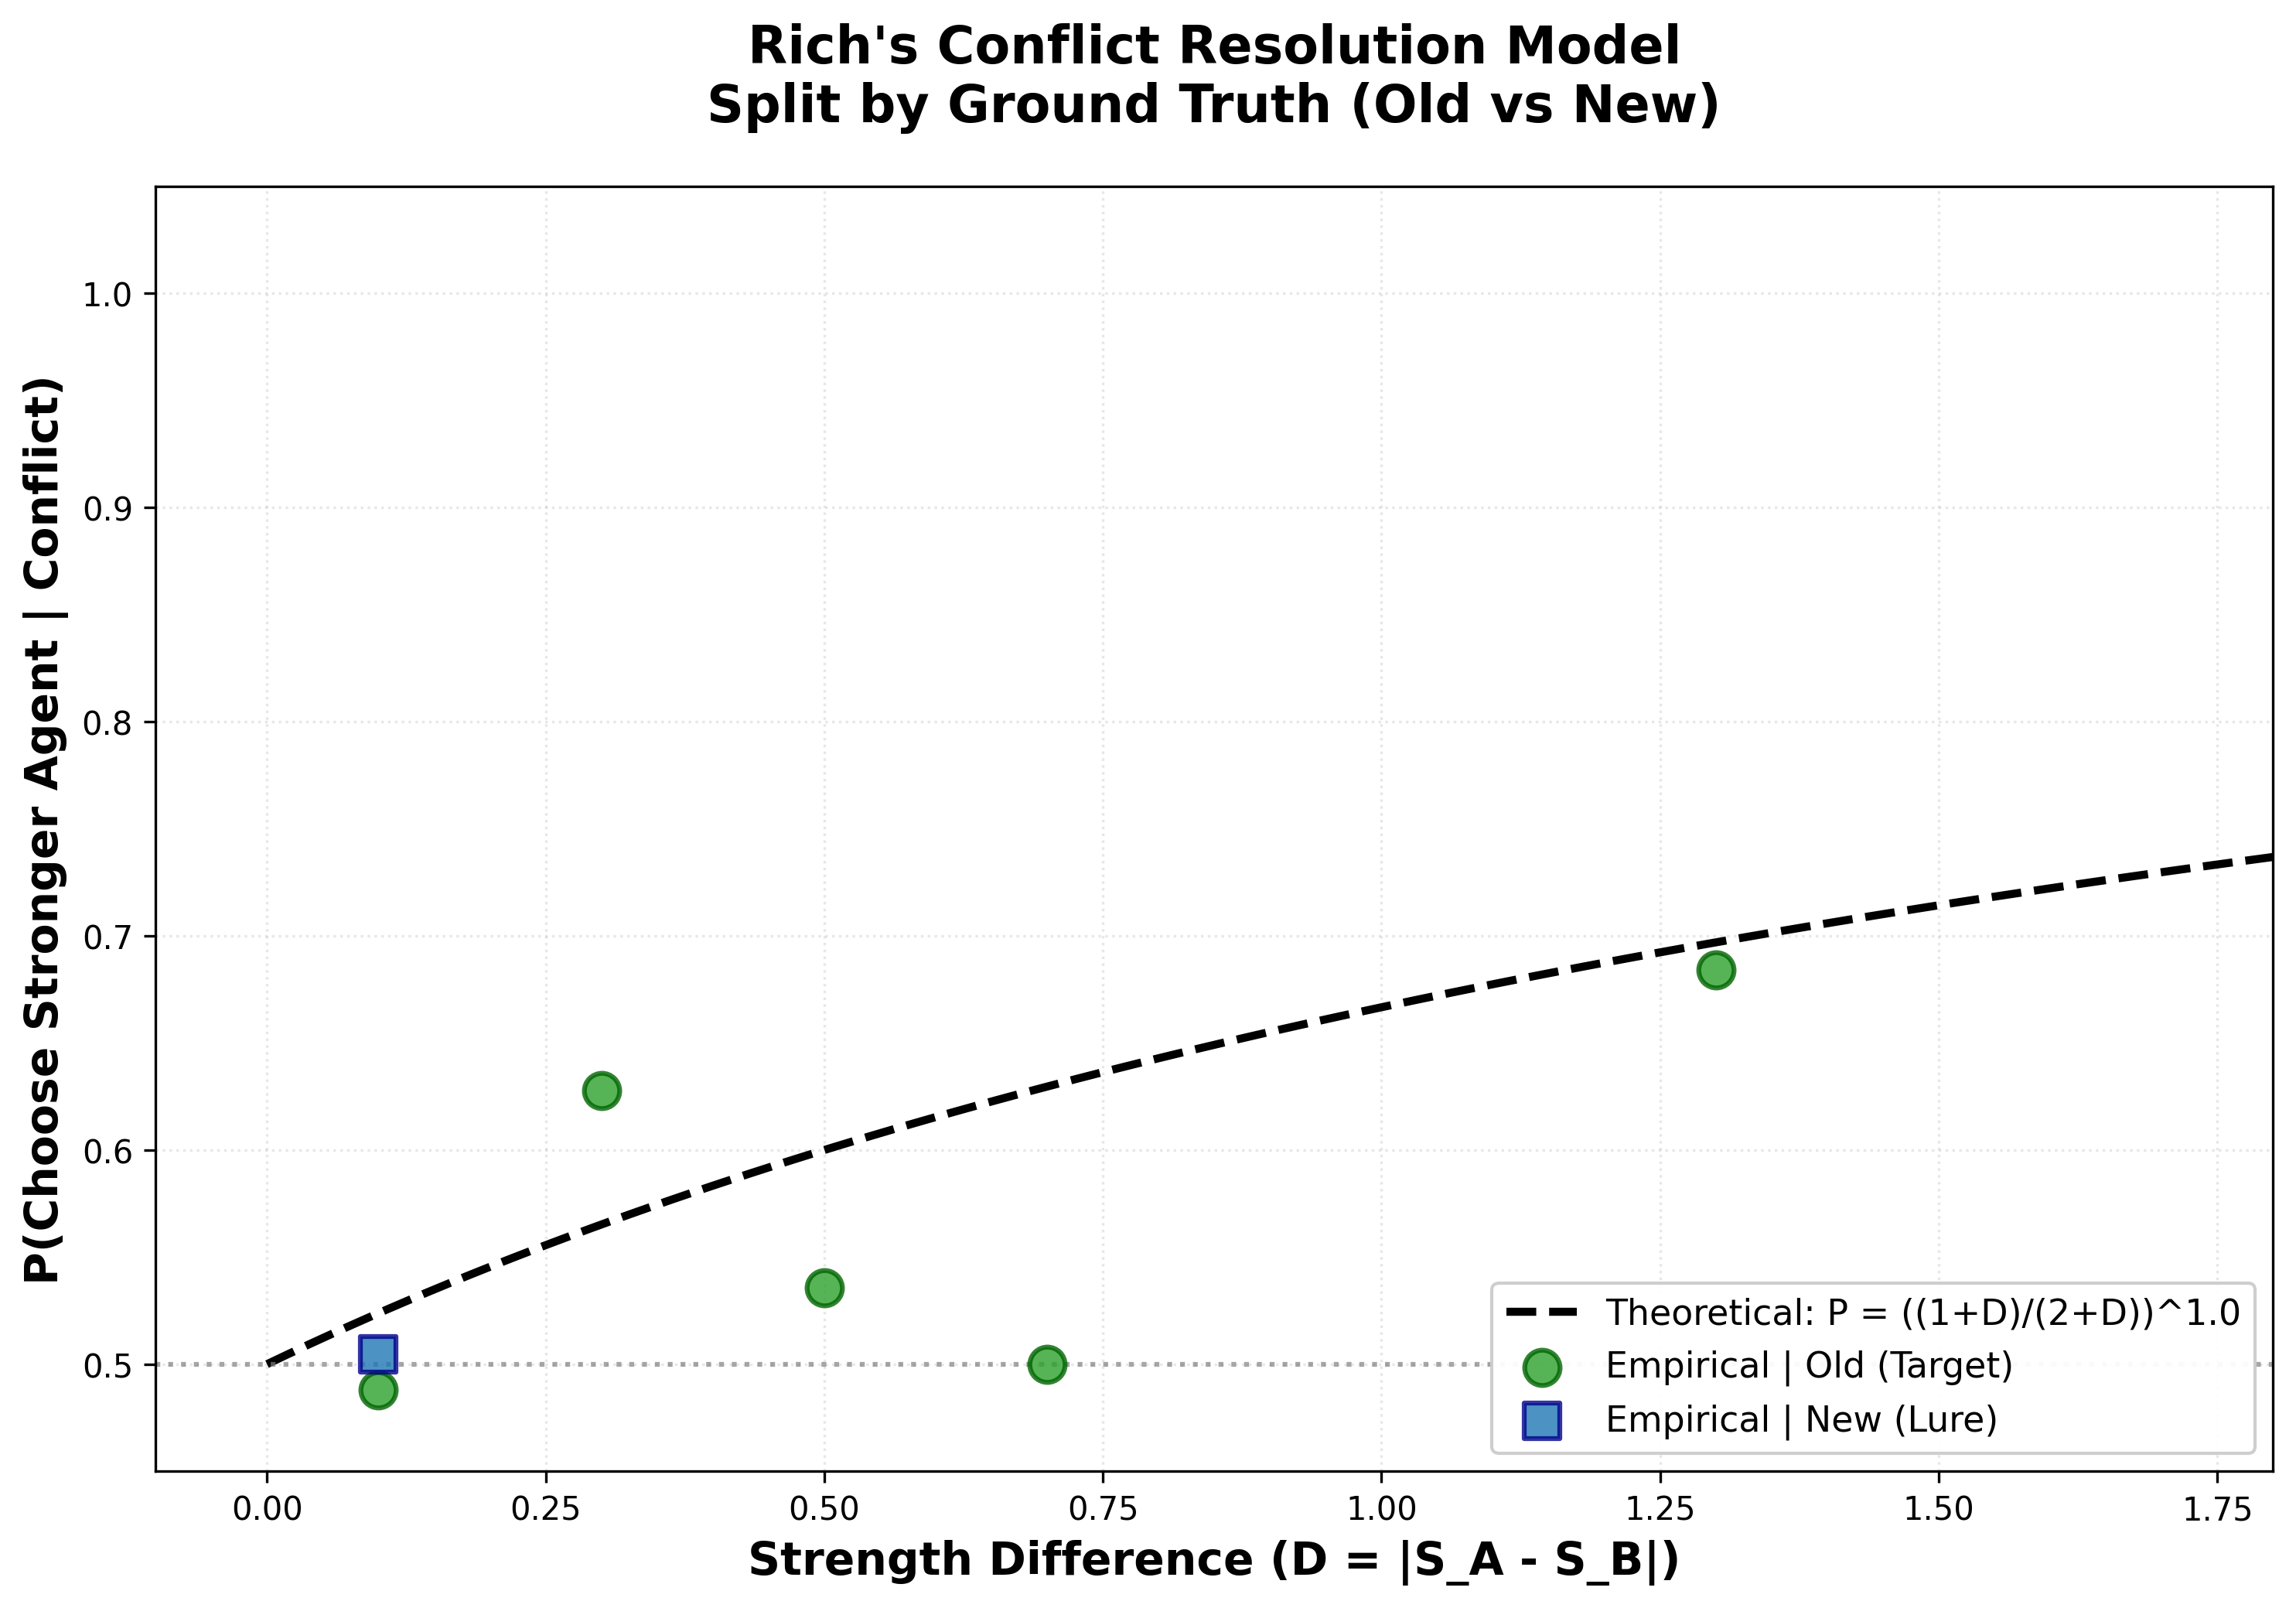

In [12]:
# Display the conflict resolution plot
display(Image('../outputs/rich_conflict_plot.png'))

In [13]:
# Optional: Test with different beta values
# Uncomment to run:
#df_rich_beta_05 = run_simulation.run_rich_conflict_simulation(beta=0.5)
#df_rich_beta_15 = run_simulation.run_rich_conflict_simulation(beta=1.5)

---

## Part 4: Trial-by-Trial Decision Traces (Interpretability)

This section provides a **microscopic view** of how group rules make decisions on specific trial sequences.

### The Missing Piece Rich Wants

Unlike Parts 1-3 which show **average behavior** over many trials, this section shows **concrete examples** of "what happens on trial 1, trial 2, trial 3..."

**Rich's Question**: 
> "But what happens on the first conflict? What exactly does the model do on the second one?"

**Key Insight**:
- This is NOT about learning (whether trial 2 changes because of trial 1)
- This is about **interpretability**: In a given evidence sequence, how does each rule resolve each conflict?

### What This Shows

For a sequence of ~20 trials, we record:
- Evidence strengths (L_A, L_B) on each trial
- Individual decisions (Agent A, Agent B)
- Group decisions (DSS, DMC, BF) on the **SAME** trials
- When agents conflict (disagree)
- When rules diverge (DSS ≠ DMC ≠ BF)

This allows Rich to point at a specific trial and ask: "Why did DSS say Old but DMC say New on trial 7?"

In [14]:
# Run trial-by-trial trace (20 trials)
df_trace = run_simulation.run_trial_by_trial_trace(n_trials=20, seed=42)


TRIAL-BY-TRIAL DECISION TRACE
Number of trials: 20
Purpose: Show concrete examples of how rules decide on specific trials

Computing group decisions for 20 trials...
Conflict trials: 10/20

✓ Data saved: ../outputs/trial_trace_data.csv

SUMMARY
Total trials: 20
Conflict trials: 10 (50.0%)

Accuracy:
  DSS: 16/20 (80.0%)
  DMC: 16/20 (80.0%)
  BF:  12/20 (60.0%)

Rule Agreement:
  DSS = DMC: 20/20 trials
  DSS = BF:  14/20 trials
  DMC = BF:  14/20 trials


### Inspect Trial-Level Data

Here we can see the exact evidence values and decisions for each trial.

In [15]:
# Display all trials (full DataFrame)
df_trace

,trial_index,L_A,L_B,dec_A,dec_B,is_conflict,team_DSS,team_DMC,team_BF,true_label,DSS_correct,DMC_correct,BF_correct
0,1,-0.796398,-0.590946,0,0,False,0,0,0,0,True,True,True
1,2,-0.303164,-0.260770,0,0,False,0,0,0,0,True,True,True
2,3,2.569753,0.540992,1,1,False,1,1,1,1,True,True,True
3,4,0.101310,-0.041039,1,0,True,1,1,0,1,True,True,False
4,5,-0.640295,-0.180164,0,0,False,0,0,0,0,True,True,True
5,6,-0.345442,0.302075,0,1,True,0,0,0,1,False,False,False
6,7,-0.272493,-0.413309,0,0,False,0,0,0,1,False,False,False
7,8,1.466023,-0.490530,1,0,True,1,1,1,1,True,True,True
8,9,-0.656513,-0.525942,0,0,False,0,0,0,0,True,True,True
9,10,0.324898,0.144936,1,1,False,1,1,1,0,False,False,False


### Decision Trace Visualization

Now visualize how evidence and decisions evolve across trials.

✓ Plot saved: ../outputs/trial_trace_plot.png


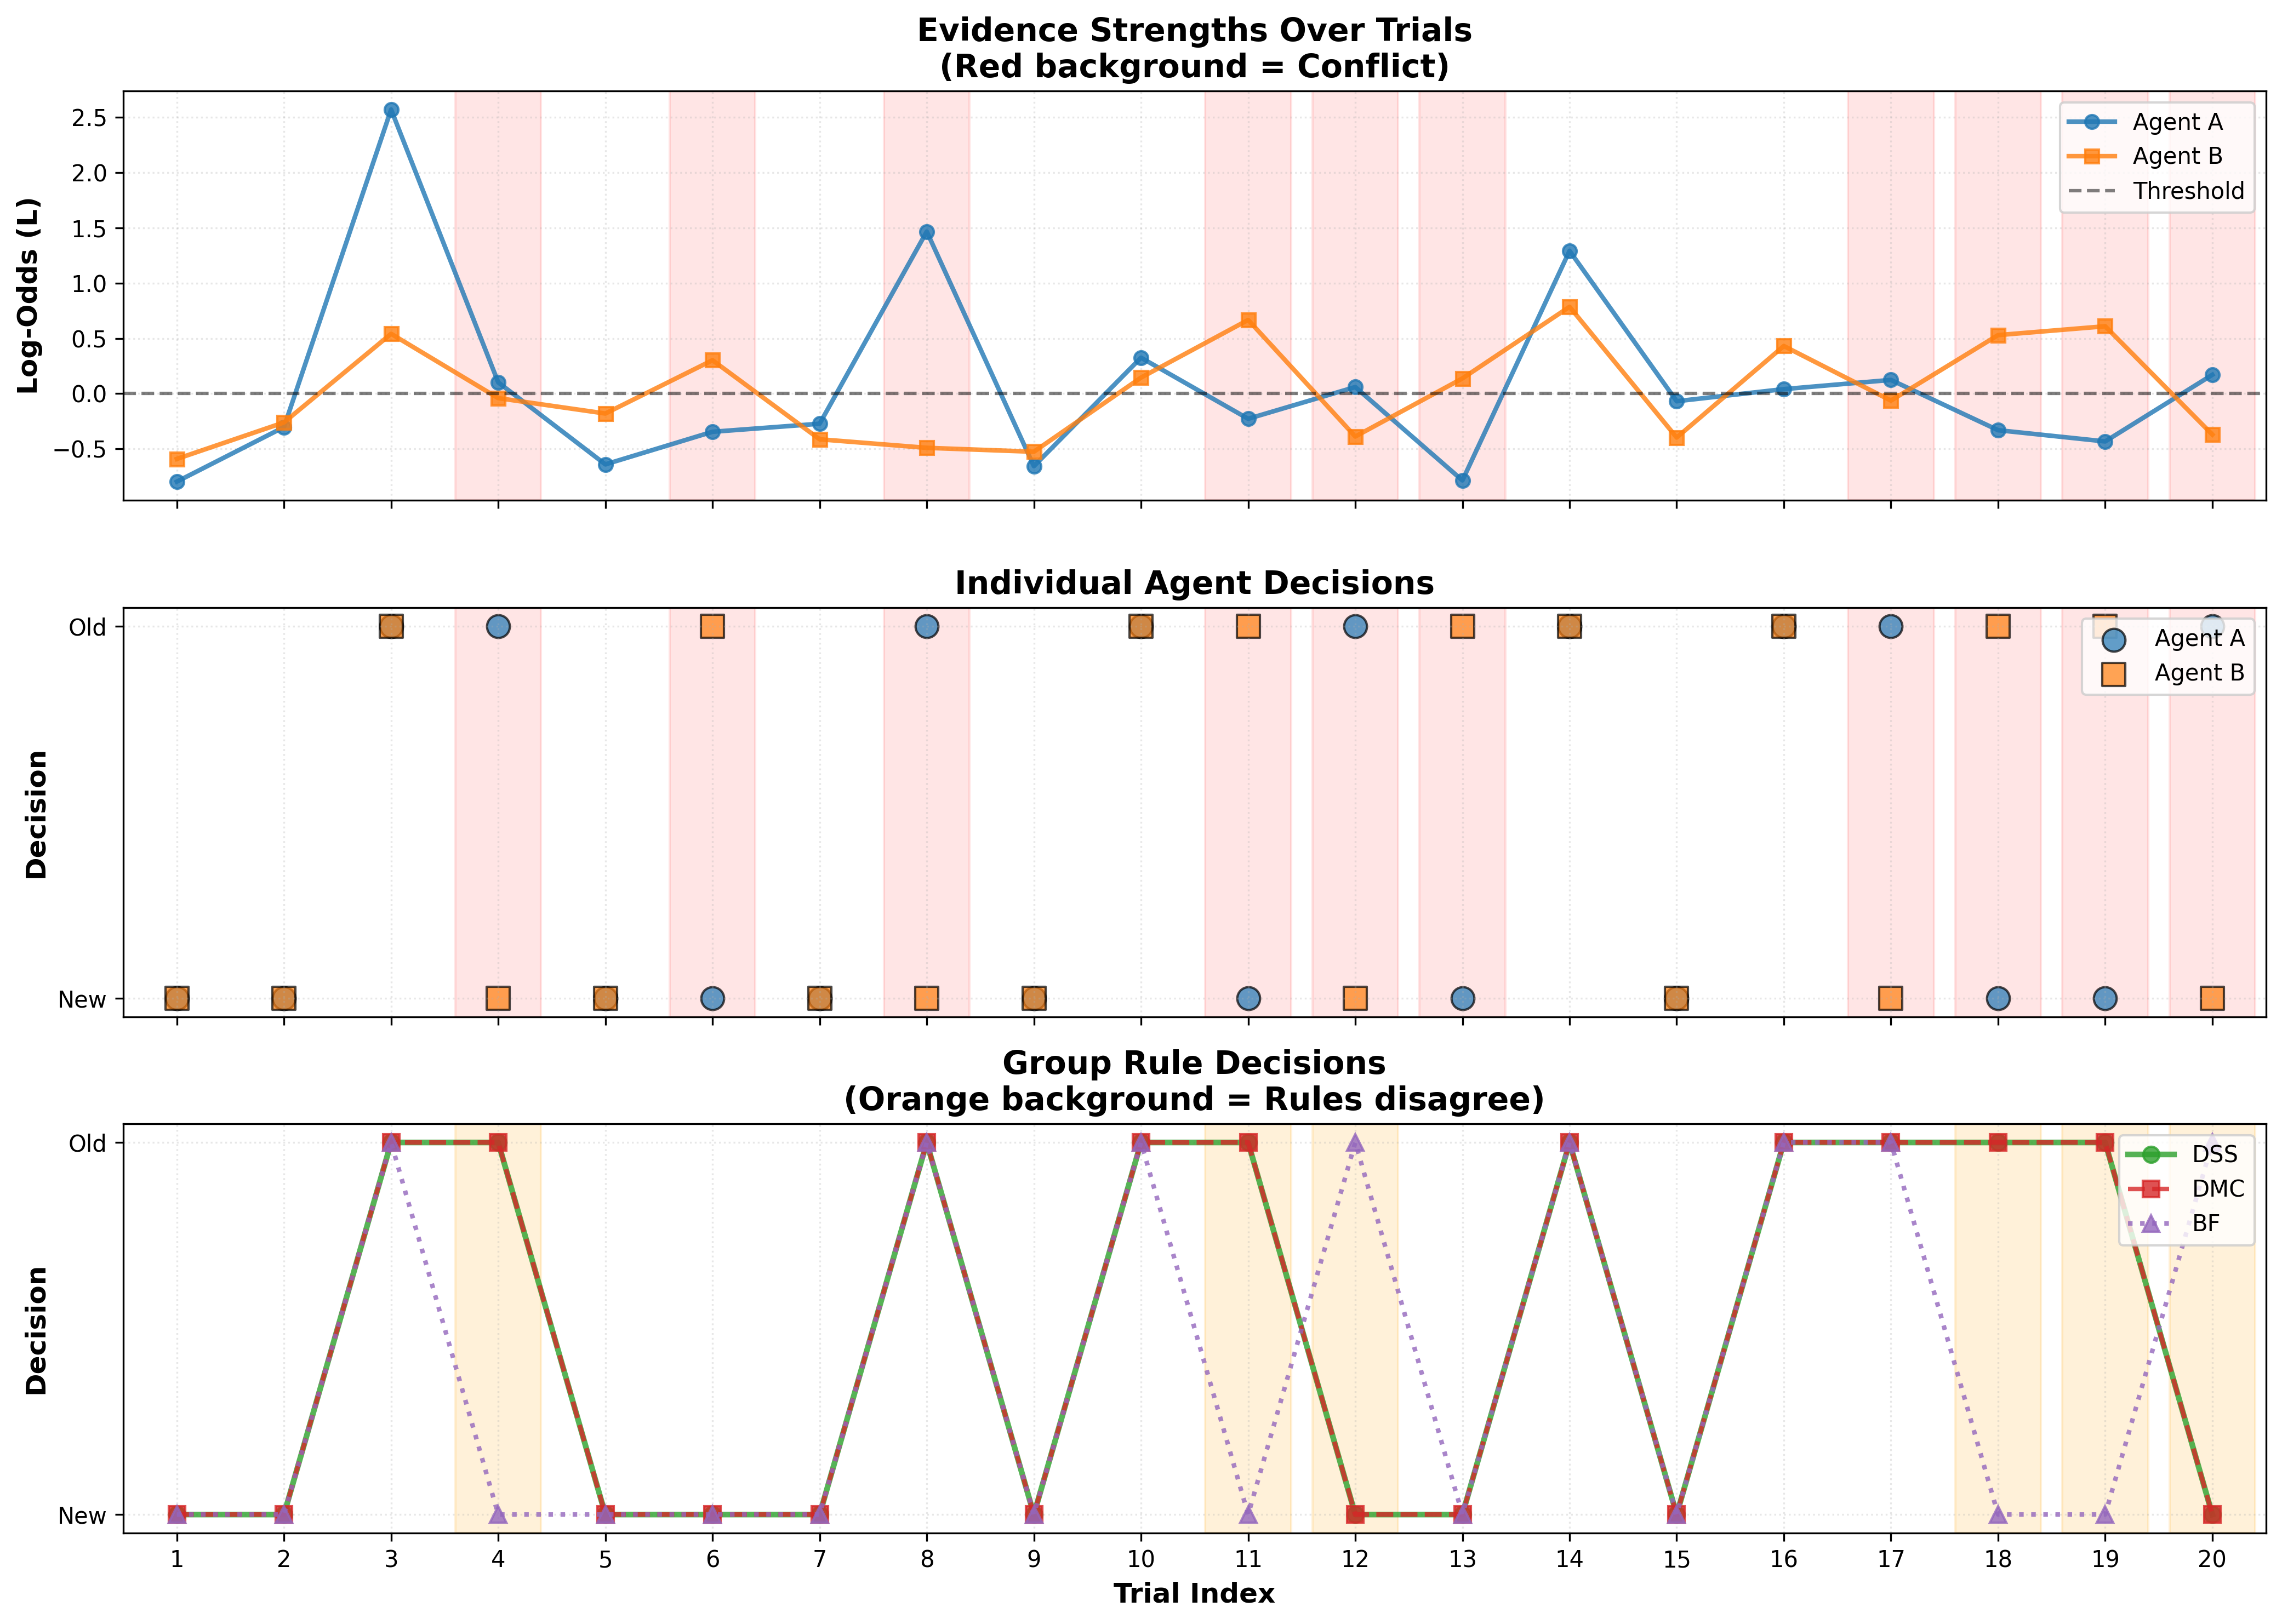

In [16]:
# Generate trial trace plot
run_simulation.create_trial_trace_plot(df_trace)

# Display the plot
display(Image('../outputs/trial_trace_plot.png'))

### How to Read This Plot

**Panel 1 (Evidence Strengths)**:
- Shows L_A (blue circles) and L_B (orange squares) over trials
- Horizontal dashed line at y=0 is the decision threshold
- **Red background** = Conflict trial (agents disagree)
- Look for trials where L_A and L_B have opposite signs

**Panel 2 (Individual Decisions)**:
- Shows what each agent decided (0=New, 1=Old)
- When points are at different heights, agents conflict
- **Red background** highlights these conflicts

**Panel 3 (Group Decisions)**:
- DSS (green circles, solid line)
- DMC (red squares, dashed line)
- BF (purple triangles, dotted line)
- **Orange background** = Rules disagree on this trial
- Look for trials where the three lines diverge

### Key Questions This Answers

1. **On conflict trials, do all rules agree?**
   - No! DSS and DMC often diverge
   - Example: If L_A = +0.3, L_B = +0.4 (both weakly Old)
     - DMC might follow A (because |L_A| > |L_B| by chance)
     - DSS pools both: L_A + L_B = +0.7 → strong Old signal

2. **When do rules disagree?**
   - Typically when evidence is weak or conflicting
   - DSS integrates both voices → more robust
   - DMC delegates to one voice → more volatile

3. **Can we point to specific examples?**
   - YES! "Look at trial 7 - why did DSS say Old but DMC say New?"
   - The DataFrame shows exact L_A, L_B values for inspection

### The Mechanistic Transparency Rich Wanted

This is the shift from:
- **"DSS has 10% higher CBR on average"** (statistical superiority)
- To **"On trial 7, here's exactly what DSS did vs what DMC did"** (mechanistic transparency)